In [1]:
import time
begin_start_time = time.time()
time_str = time.strftime('%Y-%m-%d %H-%M-%S', time.localtime(begin_start_time))
print(time_str)

2025-10-28 19-19-10


In [2]:
import torch, pandas as pd, os
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
from DQN.agent_eval import head_to_head, plot_winrate_bar
from pprint import pprint
import matplotlib.pyplot as plt
from DQN.h2h_to_excel import append_h2h_to_excel

In [4]:
### classic 
A = "Connect4 DQN model.pt"
B = "DISTILLED RANDOM V DQN model.pt"

### interims

#A = "phase-L1_Intro Interim Connect4 DQN model.pt"
#A = "phase-L1_Tickle Interim Connect4 DQN model.pt"

#### special
#B = "Backup/RANDOM I DQN model.pt"
#A = "Backup/RANDOM II DQN model.pt"
#B = "RANDOM IV DQN model.pt"
#B = "DISTILLED RANDOM V DQN model.pt"
#A = "DISTILLED RANDOM VI DQN model.pt"


####
GAMES = 5000
res = head_to_head(A, B, n_games=GAMES, device=device, epsilon=0.0, guard_prob=0.0,  opening_noise_k=1, seed=666,progress=True)

Connect4 DQN model.pt vs DISTILLED RANDOM V DQN model.pt:   0%|          | 0/5000 [00:00<?, ?it/s]

In [5]:
pprint(res)
print(f"\nA score = {res['A_score_rate']:.3f}  (95% CI {res['A_score_CI95'][0]:.3f}–{res['A_score_CI95'][1]:.3f})")

{'A_losses': 5000,
 'A_path': 'Connect4 DQN model.pt',
 'A_score_CI95': (0.0, 0.0),
 'A_score_rate': 0.0,
 'A_wins': 0,
 'B_path': 'DISTILLED RANDOM V DQN model.pt',
 'draws': 0,
 'games': 5000}

A score = 0.000  (95% CI 0.000–0.000)


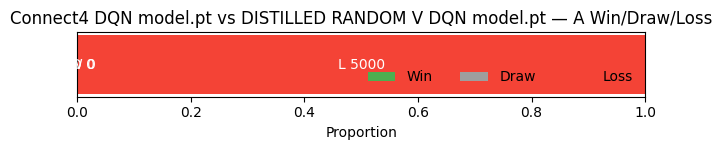

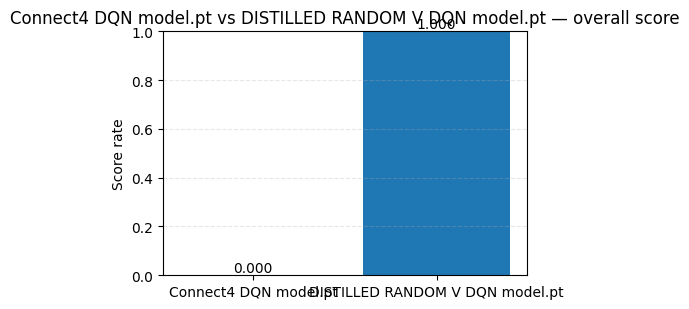

In [6]:
plot_winrate_bar(res)

In [7]:
append_h2h_to_excel(res)

In [8]:
end_time = time.time()
total_elapsed = (end_time - begin_start_time) / 60
print(f"Evaluation completed in {total_elapsed:.1f} minutes")

Evaluation completed in 11.1 minutes
